# Benchmarking 1d range search

In [1]:
import Task31
import Task43
import Task51
import Task53
from sanitize_input import Tests
import random
import numpy as np
import matplotlib.pyplot as plt

In [84]:
def random_coords(n,d):
    return [[random.randrange(1, 1000, 1) for _ in range(d)] for _ in range(n)]
#random.randrange(i, 1000, 1)
random_coords(4, 2)

[[434, 826], [945, 829], [440, 611], [201, 792]]

In [106]:
d2n10 = random_coords(10, 2)
d2n100 = random_coords(100, 2)
d2n1_000 = random_coords(1000, 2)
d2n10_000 = random_coords(10_000, 2)
d2n100_000 = random_coords(100_000, 2)
#d2n1_000_000 = random_coords(1_000_000, 2)
n_sizes = [d2n10, d2n100, d2n1_000, d2n10_000, d2n100_000]#, d2n1_000_000] 

In [127]:
def create_test_ns(d):
    return [random_coords(10**i, d) for i in range(1,6)]

In [125]:
lbound, ubound = (250, 250), (600, 600)
lbound, ubound = [250]*2, [600]*2
len(n_sizes[-1])

100000

## Naïve

In [69]:
def bruteforce(n, lower, upper):
    res = []
    for e in n:
        b = len(e)
        a = %timeit -o list(Task31.simple_range_query(e, lower, upper))
        res.append((b,a))
    return res

In [90]:
bruteforce(n_sizes, lbound, ubound)

16.6 µs ± 7.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
139 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.24 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
18.5 ms ± 7.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
106 ms ± 4.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.05 s ± 8.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[(10,
  <TimeitResult : 16.6 µs ± 7.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>),
 (100,
  <TimeitResult : 139 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>),
 (1000,
  <TimeitResult : 1.24 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (10000,
  <TimeitResult : 18.5 ms ± 7.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>),
 (100000,
  <TimeitResult : 106 ms ± 4.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>),
 (1000000,
  <TimeitResult : 1.05 s ± 8.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>)]

Above is the naïve implementation times, as you can see it looks like a constant operation from ten to a million

## Build KD-Tree

In [58]:
def build_kd_tree(n, *_):
    res = []
    for e in n:
        b = len(e)
        a = %timeit -o Task43.KDTree(e)
        res.append((b,a))
    return res

In [91]:
build_kd_tree(n_sizes)

35.4 µs ± 4.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
424 µs ± 83.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.84 ms ± 381 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
68.4 ms ± 3.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
888 ms ± 73.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.6 s ± 67.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[(10,
  <TimeitResult : 35.4 µs ± 4.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>),
 (100,
  <TimeitResult : 424 µs ± 83.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (1000,
  <TimeitResult : 4.84 ms ± 381 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>),
 (10000,
  <TimeitResult : 68.4 ms ± 3.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>),
 (100000,
  <TimeitResult : 888 ms ± 73.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>),
 (1000000,
  <TimeitResult : 10.6 s ± 67.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>)]

## KD-Tree without Contained()

In [62]:
def kd_tree_without_contained(e, lbound, ubound):
    res = []
    b = list(zip(lbound, ubound))
    for n in e:
        d = len(n)
        a = Task43.KDTree(n).root
        c = %timeit -o Task53.get_range(a, b)
        res.append((d, c))
    return res

In [92]:
kd_tree_without_contained(n_sizes, lbound, ubound)

140 µs ± 7.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
934 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5 ms ± 414 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
35.6 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
303 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.95 s ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[(10,
  <TimeitResult : 140 µs ± 7.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>),
 (100,
  <TimeitResult : 934 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (1000,
  <TimeitResult : 5 ms ± 414 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>),
 (10000,
  <TimeitResult : 35.6 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>),
 (100000,
  <TimeitResult : 303 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>),
 (1000000,
  <TimeitResult : 2.95 s ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>)]

## KD-Tree with Contained()

In [63]:
def kd_tree_with_contained(e, lbound, ubound):
    res = []
    for n in e:
        d = len(n)
        a = Task43.KDTree(n).root
        b = list(zip(lbound, ubound))
        c = %timeit -o Task51.Util(a, b)
        res.append((d, c))
    return res

In [93]:
kd_tree_with_contained(n_sizes, lbound, ubound)

175 µs ± 30.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.02 ms ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.37 ms ± 449 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.6 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
87.2 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
312 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[(10,
  <TimeitResult : 175 µs ± 30.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (100,
  <TimeitResult : 1.02 ms ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (1000,
  <TimeitResult : 3.37 ms ± 449 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>),
 (10000,
  <TimeitResult : 13.6 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)>),
 (100000,
  <TimeitResult : 87.2 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>),
 (1000000,
  <TimeitResult : 312 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>)]

## Build KD-Tree and run without contained

In [64]:
def kd_tree_without_contained_plus_build(e, lbound, ubound):
    res = []
    for n in e:
        d = len(n)
        b = list(zip(lbound, ubound))
        c = %timeit -o Task53.get_range(Task43.KDTree(n).root, b)
        res.append((d, c))
    return res

In [94]:
kd_tree_without_contained_plus_build(n_sizes, lbound, ubound)

171 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.32 ms ± 9.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
9.68 ms ± 364 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
95.3 ms ± 666 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.14 s ± 5.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.6 s ± 3.16 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


[(10,
  <TimeitResult : 171 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>),
 (100,
  <TimeitResult : 1.32 ms ± 9.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (1000,
  <TimeitResult : 9.68 ms ± 364 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>),
 (10000,
  <TimeitResult : 95.3 ms ± 666 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>),
 (100000,
  <TimeitResult : 1.14 s ± 5.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>),
 (1000000,
  <TimeitResult : 15.6 s ± 3.16 s per loop (mean ± std. dev. of 7 runs, 1 loop each)>)]

## Build KD-Tree and run with contained

In [65]:
def kd_tree_with_contained_plus_build(e, lbound, ubound):
    res = []
    for n in e:
        d = len(n)
        b = list(zip(lbound, ubound))
        c = %timeit -o Task51.Util(Task43.KDTree(n).root, b)
        res.append((d,c))
    return res

In [95]:
kd_tree_with_contained_plus_build(n_sizes, lbound, ubound)

249 µs ± 63.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.57 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.26 ms ± 433 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
80.9 ms ± 4.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
926 ms ± 7.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11 s ± 335 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[(10,
  <TimeitResult : 249 µs ± 63.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (100,
  <TimeitResult : 1.57 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (1000,
  <TimeitResult : 8.26 ms ± 433 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>),
 (10000,
  <TimeitResult : 80.9 ms ± 4.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>),
 (100000,
  <TimeitResult : 926 ms ± 7.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>),
 (1000000,
  <TimeitResult : 11 s ± 335 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>)]

## Plot

In [78]:
def print_thing(r):
    return [(i, m.average, m.stdev) for i, m in r]

In [109]:
def try_bounds(es, lo, up, d):
    l, u = [lo]*d, [up]*d
    print(l, u)
    funcs = [bruteforce, build_kd_tree, kd_tree_without_contained, kd_tree_with_contained, 
         kd_tree_without_contained_plus_build, kd_tree_with_contained_plus_build]
    return [(f.__name__, print_thing(f(es, l, u))) for f in funcs]

In [96]:
dis = try_bounds(n_sizes, 250, 600, 2)

[[94, 230], [110, 962], [144, 155], [191, 48], [320, 77], [352, 941], [397, 647], [425, 820], [569, 679], [853, 792]]
11.3 µs ± 160 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
102 µs ± 610 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
996 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
11.2 ms ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
125 ms ± 4.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.26 s ± 5.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
31.8 µs ± 381 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
374 µs ± 3.23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.58 ms ± 66.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
60.4 ms ± 681 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
831 ms ± 8.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.5 s ± 2.72 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
160 µs ± 12 µs per loop (mean ± st

In [97]:
dis

[('bruteforce',
  [(10, 1.1323112331429652e-05, 1.5971399105865506e-07),
   (100, 0.00010154304658572073, 6.099127054919078e-07),
   (1000, 0.0009958263617143401, 1.3997111845123542e-05),
   (10000, 0.011224769082857943, 5.6694730276900146e-05),
   (100000, 0.12533146447142046, 0.004389243779121962),
   (1000000, 1.2606177708572173, 0.005909849347584793)]),
 ('build_kd_tree',
  [(10, 3.183674859999103e-05, 3.805734362127245e-07),
   (100, 0.0003740573435713616, 3.233504915306845e-06),
   (1000, 0.004578093285713944, 6.687013203180574e-05),
   (10000, 0.06038564167142795, 0.0006810198046943736),
   (100000, 0.8305846325714421, 0.008216817886256481),
   (1000000, 11.461824260857222, 2.716352238859035)]),
 ('kd_tree_without_contained',
  [(10, 0.00016030695795715734, 1.2043474312082479e-05),
   (100, 0.001098746728428523, 0.00011834318321343077),
   (1000, 0.005848665728570788, 0.0007598737010862822),
   (10000, 0.03629671355713201, 0.0019291116508678558),
   (100000, 0.49878209314283595,

In [128]:
dis10 = try_bounds(create_test_ns(10), 250, 600, 10)

[250, 250, 250, 250, 250, 250, 250, 250, 250, 250] [600, 600, 600, 600, 600, 600, 600, 600, 600, 600]
16.2 µs ± 4.45 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
126 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.13 ms ± 66.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
18.1 ms ± 3.75 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
122 ms ± 8.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
38.4 µs ± 6.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
465 µs ± 44.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.33 ms ± 732 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
76.2 ms ± 7.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
989 ms ± 76.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
739 µs ± 23.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.28 ms ± 389 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
55.7 ms ± 3.85 ms per loop (mean ± st

In [129]:
dis10

[('bruteforce',
  [(10, 1.619757769857123e-05, 4.446100868722267e-06),
   (100, 0.00012615294428574737, 1.1888137351397295e-05),
   (1000, 0.0011271034059999953, 6.657134633592185e-05),
   (10000, 0.018064928029999854, 0.0037461496616091237),
   (100000, 0.12182437275713968, 0.008313386922446405)]),
 ('build_kd_tree',
  [(10, 3.839375545713405e-05, 6.1429483634890585e-06),
   (100, 0.0004653736400000525, 4.445577822063185e-05),
   (1000, 0.006332723267143073, 0.0007320823491299918),
   (10000, 0.0761547160000126, 0.007409471627736628),
   (100000, 0.9890750991428702, 0.07617930635701875)]),
 ('kd_tree_without_contained',
  [(10, 0.0007390158137142342, 2.3260159400825622e-05),
   (100, 0.006277341951427583, 0.00038939444746989517),
   (1000, 0.055742880842853997, 0.0038533840393129835),
   (10000, 0.3726340824285736, 0.00806825716066457),
   (100000, 1.1852560171429494, 0.058869455500523846)]),
 ('kd_tree_with_contained',
  [(10, 0.000799476075428499, 5.78287923648231e-05),
   (100, 0.0

In [171]:
dis50 = try_bounds(create_test_ns(50), 250, 600, 50)
dis50

[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250] [600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600]
16.7 µs ± 5.65 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
129 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.18 ms ± 85.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.1 ms ± 674 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
122 ms ± 3.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
33.7 µs ± 3.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
425 µs ± 92.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops

[('bruteforce',
  [(10, 1.667107252999943e-05, 5.648067725332823e-06),
   (100, 0.00012945935847142857, 1.3123026577355535e-05),
   (1000, 0.0011772785952857052, 8.541699242036164e-05),
   (10000, 0.013081132487142376, 0.0006740956099621739),
   (100000, 0.12215972785738163, 0.003433122049392022)]),
 ('build_kd_tree',
  [(10, 3.366136781430344e-05, 3.3965089326126854e-06),
   (100, 0.0004248827915713004, 9.220918497846778e-05),
   (1000, 0.005281752485715126, 0.0008784346094745433),
   (10000, 0.07373011592856397, 0.005132443426146167),
   (100000, 1.0046542837143144, 0.06661678897583855)]),
 ('kd_tree_without_contained',
  [(10, 0.0011314803455714875, 5.670787722142433e-05),
   (100, 0.026582841585721845, 0.0030814688885791456),
   (1000, 0.2588291512856813, 0.0011491898823399968),
   (10000, 2.6817398512857835, 0.14657988683488646),
   (100000, 26.912628956571748, 0.5158615258970018)]),
 ('kd_tree_with_contained',
  [(10, 0.001181859116999736, 0.00010586986448743209),
   (100, 0.0280

[('bruteforce',
  [(10, 1.1778835962859374e-05, 6.936117047600264e-07),
   (100, 0.00010406255820001077, 8.219070556357591e-07),
   (1000, 0.0011035178480002026, 6.926655222295496e-05),
   (10000, 0.012754771925712184, 0.00033367600607365876),
   (100000, 0.12424436265713926, 0.00089355893316469)]),
 ('build_kd_tree',
  [(10, 3.336587865715046e-05, 2.1119450218210064e-06),
   (100, 0.0004386850884285585, 3.416235401667042e-05),
   (1000, 0.005117176477145091, 0.0003739331815332049),
   (10000, 0.07427925828572239, 0.0011068106164628514),
   (100000, 1.0828080577143087, 0.01351346966729681)]),
 ('kd_tree_without_contained',
  [(10, 0.006163254558570251, 0.00027149696293723654),
   (100, 0.06333454284285836, 0.0031901214723601013),
   (1000, 0.4636885572858124, 0.02120145692146774),
   (10000, 5.030696283142788, 0.03834817162392313),
   (100000, 52.70424393442863, 2.534421052994423)]),
 ('kd_tree_with_contained',
  [(10, 0.007995455614285935, 0.0025931858000593543),
   (100, 0.1790675257

In [30]:
with open('results.txt', 'w') as f:
    af = '\n'.join(str(e) for e in dis)
    f.write(af)

## plot plan
Plan is probably to display the data from a np dataframe to matplotlib. The plot will probably be line graphs with ranges such as: precise (within 20%), with all on 1 side of median and not, broad (80%), middle (50%) and 1 element query. 

In [ ]:
%matplotlib inline

In [98]:
names = ["Bruteforce", "Build KD-tree", "KD-tree only intersection", "KD-tree with contained", 
         "KD-tree build + intersection only search", "KD-tree build + with contained search"]

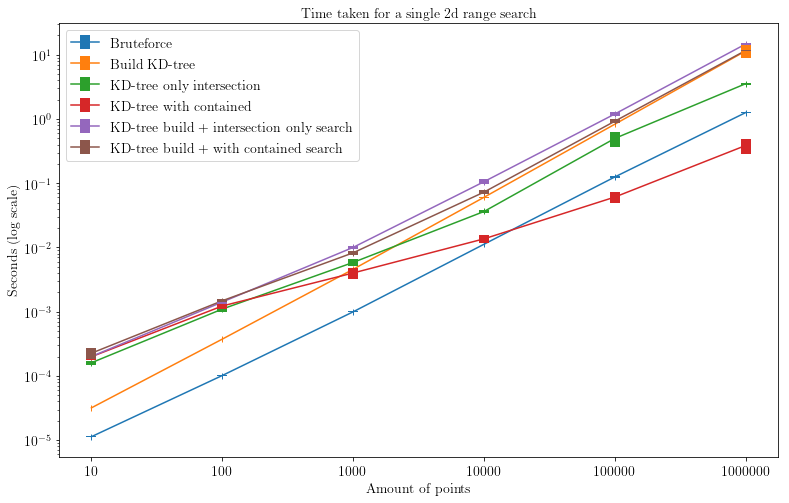

In [166]:
def draw_plot(n, data, title):
    fig, ax = plt.subplots()
    a = [str(10**i) for i in range(1,n)]
    for p,i in enumerate(data):
        plt.yscale('log')
        err = np.array([e[2] for e in i[1]])
        v = np.array([e[1] for e in i[1]])
#        print(err,'WOOT', v)
#        print(a, v, err)
        ax.errorbar(a, v, err, fmt='-|', elinewidth=10, barsabove=1, label=names[p])
    ax.legend()
    ax.set_xlabel("Amount of points")
    ax.set_ylabel("Seconds (log scale)")
    ax.set_title(title)
    plt.show()
draw_plot(7, dis, "Time taken for a single 2d range search")

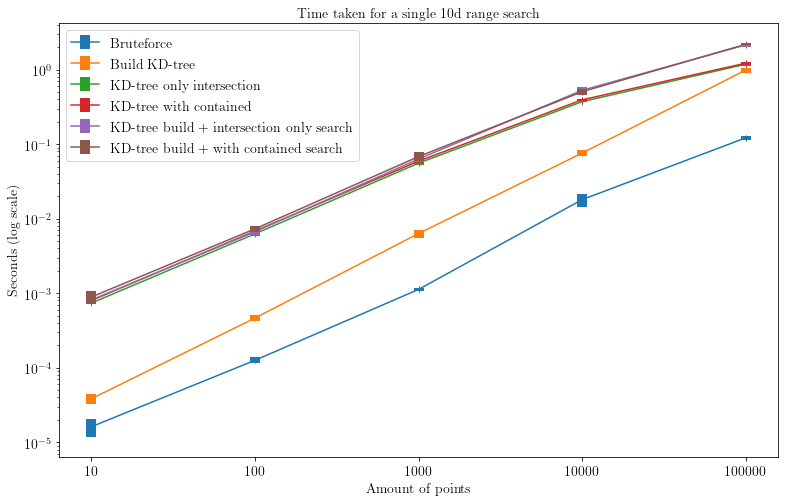

In [167]:
draw_plot(6, dis10, "Time taken for a single 10d range search")

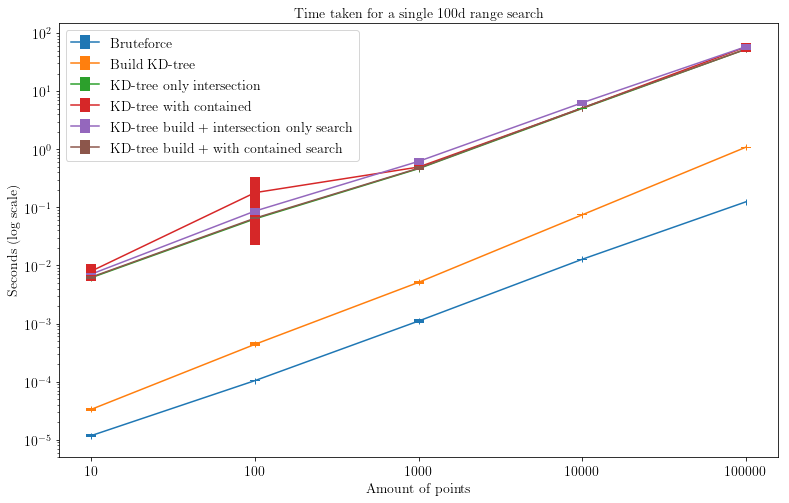

In [170]:
draw_plot(6, dis100, "Time taken for a single 100d range search")

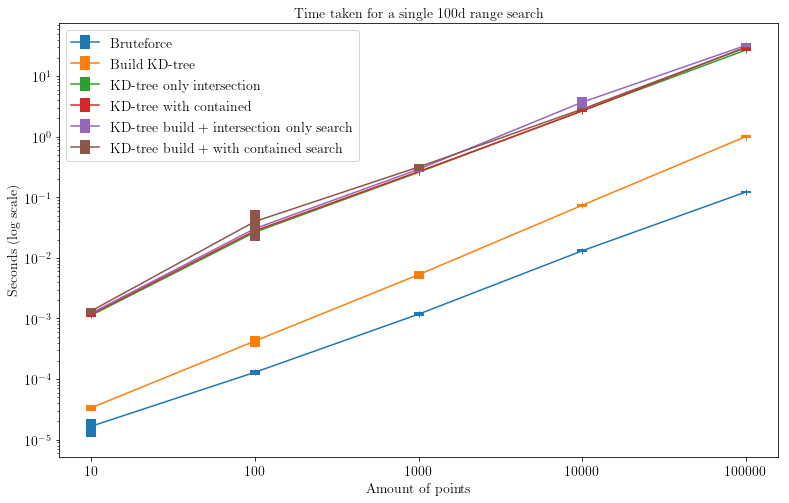

In [172]:
draw_plot(6, dis50, "Time taken for a single 100d range search")

In [310]:
#plt.tight_layout()
#format_axes(ax)
fig.savefig("250-600_plot.png")

In [181]:
dis[0][1]

[(1.0540555228577172e-06, 3.9985999144381774e-07),
 (8.583835408572408e-07, 6.095037198397183e-08),
 (8.604751715715143e-07, 1.6855399481108555e-07),
 (8.416658744285997e-07, 9.252991402602635e-08),
 (8.275391888571123e-07, 8.38129942548391e-08),
 (7.979017315713983e-07, 6.594840491951316e-08)]

In [100]:
#import pandas as pd
import matplotlib
from math import sqrt
SPINE_COLOR = 'gray'

In [101]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 14, # fontsize for x and y labels (was 10)
              'axes.titlesize': 14,
#              'text.fontsize': 10, # was 10
              'legend.fontsize': 14, # was 10
              'xtick.labelsize': 14,
              'ytick.labelsize': 14,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [102]:
width = 12.9
format_axes(ax)
latexify(width, width*(sqrt(5)-1.0)/2.0 )